In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import requests
%matplotlib inline

In [60]:
url = "https://pavelk.ru/wp-content/uploads/sheet-300x259.jpg"
r = requests.get(url)
with open('table.jpg', 'wb') as f:
    f.write(r.content)
table_img = cv2.imread('table.jpg')
table_img = cv2.cvtColor(table_img, cv2.COLOR_BGR2RGB)


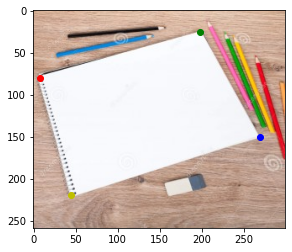

In [61]:
pt_a = np.asarray([8, 80], dtype=np.float32)
pt_b = np.asarray([198, 25], dtype=np.float32)
pt_c = np.asarray([270, 150], dtype=np.float32)
pt_d = np.asarray([45, 220], dtype=np.float32)

plt.plot(*pt_a, "ro")
plt.plot(*pt_b, "go")
plt.plot(*pt_c, "bo")
plt.plot(*pt_d, "yo")
plt.imshow(table_img)
plt.show()

In [62]:
# get relative propotions  between width and height
max_width = max(np.linalg.norm(pt_a-pt_b), np.linalg.norm(pt_c-pt_d))
max_height= max(np.linalg.norm(pt_a-pt_d), np.linalg.norm(pt_b-pt_c))

In [63]:
input_points = np.asarray([pt_a, pt_b, pt_c, pt_d], dtype=np.float32)

# set tranformed edge coordinates
opt_a = np.asarray([0, 0], dtype=np.float32)
opt_b = np.asarray([max_width, 0], dtype=np.float32)
opt_c = np.asarray([max_width, max_height], dtype=np.float32)
opt_d = np.asarray([0, max_height], dtype=np.float32)

output_points = np.asarray([opt_a, opt_b, opt_c, opt_d], dtype=np.float32)

transform_mat = cv2.getPerspectiveTransform(input_points, output_points)
transform_mat

array([[ 1.25828768e+00, -3.32547459e-01,  1.65374953e+01],
       [ 3.73722825e-01,  1.29104249e+00, -1.06273181e+02],
       [ 2.75562714e-04,  1.50580859e-03,  1.00000000e+00]])

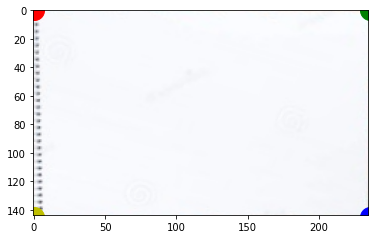

In [64]:
result = cv2.warpPerspective(table_img,transform_mat,(max_width, max_height),flags=cv2.INTER_LINEAR)


plt.plot(*opt_a, "ro", markersize=20)
plt.plot(*opt_b, "go", markersize=20)
plt.plot(*opt_c, "bo", markersize=20)
plt.plot(*opt_d, "yo", markersize=20)
plt.imshow(result)
plt.show()